In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Lab Evaluation -3 CB.EN.U4CSE20138

In [3]:
df = pd.read_csv('test.csv.xls')
df

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [4]:
df.columns


Index(['Unnamed: 0', 'Birth Weight', 'Gestational Days', 'Maternal Age',
       'Maternal Height', 'Maternal Pregnancy Weight', 'Maternal Smoker'],
      dtype='object')

In [8]:
df1 = df[['Maternal Age','Maternal Smoker']]
df1

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,28,True
3,23,True
4,25,False
...,...,...
1169,27,False
1170,24,False
1171,30,True
1172,21,False


In [9]:
df2 = df1.groupby('Maternal Smoker')

Maternal Smoker
False    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
True     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

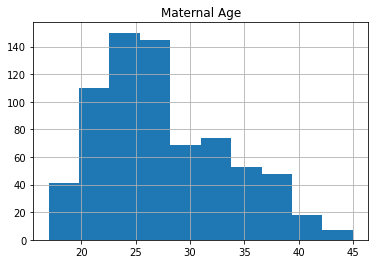

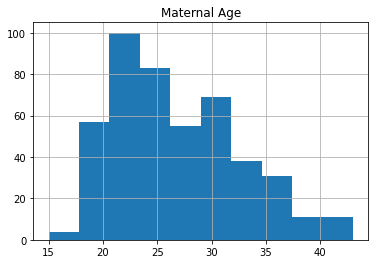

In [14]:
df2.hist()

In [18]:
smoker = df1[df1['Maternal Smoker']== True]
smoker
nonsmoker = df1[df1['Maternal Smoker']== False]
nonsmoker

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
4,25,False
5,33,False
6,23,False
...,...,...
1168,27,False
1169,27,False
1170,24,False
1172,21,False


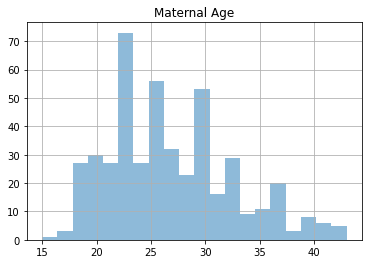

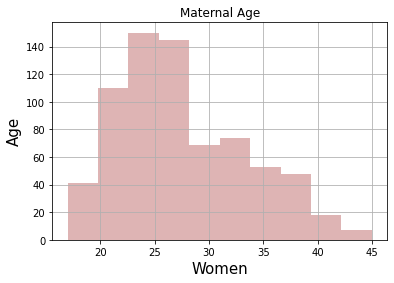

In [21]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=0.5, bins=20)
nonsmoker.hist(histtype='stepfilled', alpha=0.5, color=sns.desaturate("indianred", 0.75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

### 1) As we can see, the Average maternal age of Nonsmoking mothers is comparitively higher than the average maternal age of smoking mothers

### 2) We can use AB testing and mean difference as a test statistic with random permutation to conclude the hypothesis ( to conclude there is difference is age or not)

### 3) Null Hypothesis: The average age of the somking mothers is same as the average age of non smoking mothers ( No difference in age of smoking and non smoking mothers) 
### Alternate Hypothesis : The average age of the somking mothers is not same as the average age of non smoking mothers ( There is a difference in age of smoking and non smoking mothers) 

### 4). We can use the mean difference as the test statistics for the AB Testing. ( Difference of average age of smoking mothers and non smoking mothers)
### (Random permutation is shuffling all the maternal age randomly among the mothers)


In [10]:
 df2.mean()

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [25]:
org = df2.mean()

In [26]:
observed_stat = org['Maternal Age'][1] - org['Maternal Age'][0]
observed_stat

-0.8076725017901509

### 5) Observed Statistics: -0.8076725017901509

In [27]:
#simulation

In [28]:
val = [0] * 5000
for i in range(5000):
    shuffled = df1.sample(1174,replace=False)
    df3=df1.assign(shuffledrow=shuffled['Maternal Smoker'].values)
    combined = df3.groupby('shuffledrow').mean()
    newstat = combined['Maternal Age'][1] - combined['Maternal Age'][0]
    val[i] = newstat

In [29]:
val

[0.047290400231577934,
 0.5373737373737377,
 -0.5286469521763628,
 0.49802398037692086,
 0.03655864832335709,
 -0.07075887075886911,
 0.07948565595624402,
 -0.5071834483599176,
 0.37639745875039665,
 -0.5000289470877703,
 0.5516827399180357,
 -0.1637673872967973,
 -0.08149062266708995,
 -0.045718116306350254,
 0.44078797019973237,
 0.458674223380104,
 -0.10653137711961236,
 -0.8327132562426698,
 0.19395767631061744,
 -0.09937687584746513,
 -1.0473482944071186,
 0.0759084053201704,
 -0.19238539238539332,
 0.30842969666499087,
 0.02940414705120631,
 0.18322592440239305,
 0.05802215213980233,
 -0.10295412648353874,
 -0.10653137711961236,
 0.2333074333074343,
 -0.7933634992458529,
 0.18680317503847021,
 -0.3390526684644328,
 -0.40344317991376855,
 0.09379465850054203,
 0.011517893870834683,
 -0.18523089111324254,
 -0.031409113762055796,
 0.34062495238965695,
 0.6554230083641848,
 0.4157472157472135,
 0.67688651218063,
 0.2333074333074343,
 -0.49645169645169673,
 0.4157472157472135,
 0.0937

In [30]:
values = pd.DataFrame(val)

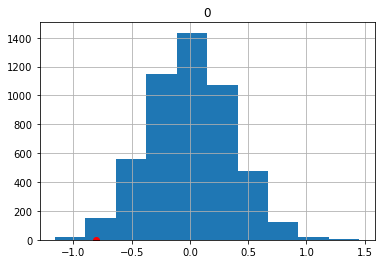

In [31]:
values.hist()
plt.scatter(observed_stat,0,color='red')


### Emperical P-value:

In [33]:
pval = np.count_nonzero(values <= observed_stat)/values.size
pval

0.009

### Emperical Pvalue: 0.009 

### We can see that p value is 0.009 which is around 1%. Since the value is less that the threshold(5%) we can say that is , it favours the alternate hypothesis.
### Hence we can reject the null Hypothesis
### Hence the average age of the somking mothers is not same as the average age of non smoking mothers ( There is a difference in age of smoking and non smoking mothers (smoking mothers age is less than non smoking mothers))